## Plotting

In [136]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
from omegaconf import OmegaConf
sys.path.insert(0, "..")
from floral.utils.plotting import (
    OUTPUT_DIR, PLOTS_DIR,
    load_runs,
    histories_to_df,
    setup_experiment_plotting_and_variables,
    plot_and_save,
    variables_metrics_to_csv,
)

HISTORIES = load_runs(output_dir=os.path.join("..", OUTPUT_DIR))

In [137]:
# ========== CHOOSE EXPERIMENT ========== #

# ----- Methods Performances ------ #
# run_methods: Clustered datasets
# EXPERIMENT = "run_methods_synthetic_linear"
# EXPERIMENT = "run_methods_synthetic_mlp"
# EXPERIMENT = "run_methods_mnist_rotate"
# EXPERIMENT = "run_methods_mnist_label_shift"
# EXPERIMENT = "run_methods_cifar10_rotate"
# EXPERIMENT = "run_methods_cifar10_label_shift"
# EXPERIMENT = "run_methods_cifar100"
# EXPERIMENT = "run_methods_mnist_rotate_reduced"
# EXPERIMENT = "run_methods_mnist_label_shift_reduced"
# EXPERIMENT = "run_methods_cifar10_rotate_reduced"
# EXPERIMENT = "run_methods_cifar10_label_shift_reduced"
# EXPERIMENT = "run_methods_cifar100_reduced"

# run_methods: General datasets
# EXPERIMENT = "run_methods_emnist"  # XXX
# EXPERIMENT = "run_methods_shakespeare"  # XXX
# EXPERIMENT = "run_methods_stackoverflow"  # XXX


# ----- Ablation Studies ----- #
# ab_convlora: Ablate LoRAs, ConvLoRAs and bias
# EXPERIMENT = "ab_floral_cifar10_rotate"
# EXPERIMENT = "ab_floral_cifar10_label_shift"
# EXPERIMENT = "ab_floral_cifar100"
# EXPERIMENT = "ab_floral_emnist"  # XXX

# ab_normlora: Ablate NorAs separately (informed by results from ab_floral)
# EXPERIMENT = "ab_normlora_cifar100"  # XXX
# EXPERIMENT = "ab_normlora_emnist"  # XXX
# EXPERIMENT = "ab_normlora_stackoverflow"  # XXX


# ----- Hyperparameters ----- #
# hp_floral: FLoRAL num clusters and rank
# EXPERIMENT = "hp_floral_cifar10_rotate"
# EXPERIMENT = "hp_floral_cifar10_label_shift"
# EXPERIMENT = "hp_floral_cifar100"
# EXPERIMENT = "hp_floral_emnist"  # XXX
# EXPERIMENT = "hp_floral_shakespeare"  # XXX

# hp_convlora: ConvLoRA methods
# EXPERIMENT = "hp_convlora_cifar10_rotate"
# EXPERIMENT = "hp_convlora_cifar10_label_shift"
# EXPERIMENT = "hp_convlora_cifar100"
# EXPERIMENT = "hp_convlora_emnist"  # XXX

# hp_batchnormlora: Batchnorm methods
# EXPERIMENT = f"hp_batchnormlora_synthetic_mlp_bn"
# EXPERIMENT = f"hp_batchnormlora_cifar100_bn"

In [138]:
filter_values = f"""
experiment: [{EXPERIMENT}]
"""
ignore_values = """
"""
history_df = histories_to_df(
    HISTORIES,
    filter_values=OmegaConf.create(filter_values),
    ignore_values=OmegaConf.create(ignore_values),
    #  downsampled_len=500,
)
results_dir = os.path.join("..", PLOTS_DIR, f"{EXPERIMENT}")
os.makedirs(results_dir, exist_ok=True)
history_df, plot_opts, variables = setup_experiment_plotting_and_variables(history_df, EXPERIMENT)

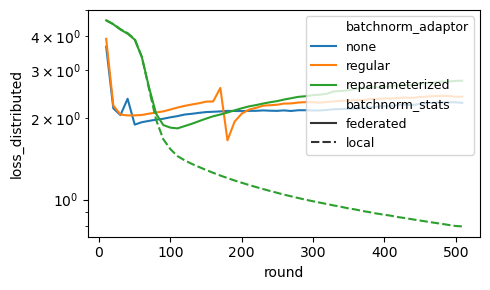

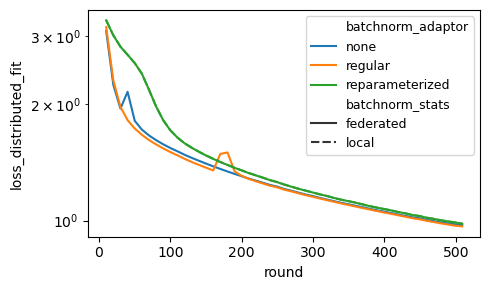

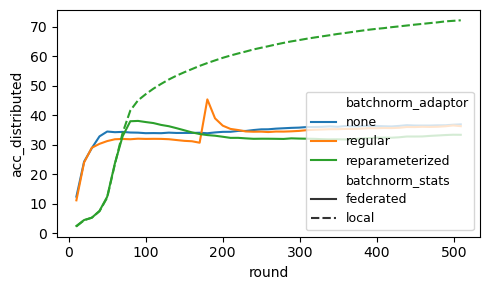

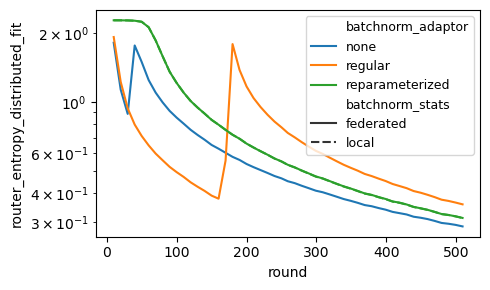

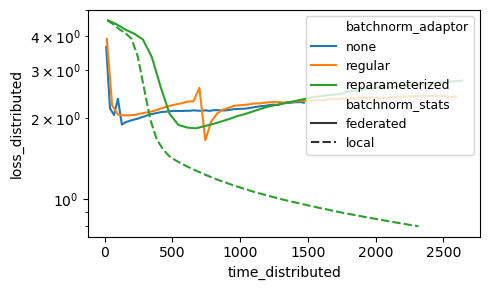

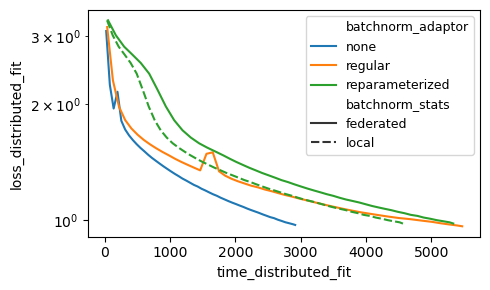

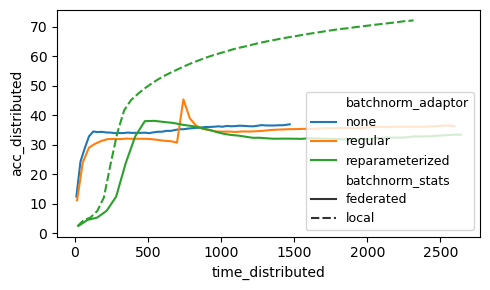

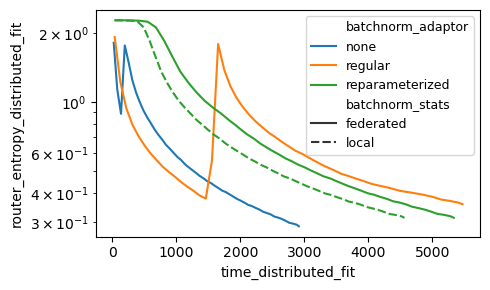

In [139]:
plot_and_save(history_df, plot_opts, results_dir)

In [140]:
variables_metrics_to_csv(history_df, variables, results_dir)

,batchnorm_adaptor,batchnorm_stats,loss_distributed,acc_distributed,total_time
50,none,federated,2.274730,36.954000,4384.618668
203,regular,federated,2.397088,36.351111,8065.258777
101,reparameterized,federated,2.746314,33.418000,7972.584977
152,reparameterized,local,0.796264,72.216000,6880.220578
